In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from nupack import Model
from nupack import structure_probability


def oligo_linear_probability(sequence, temp=47, formamide_conc=50, sodium_conc=0.390):

    # correct the temperature for formamide concentration (like in OligoMiner: raise 0.65 C per percent of formamide)
    temp += formamide_conc * 0.65

    # make NUPACK DNA model with specified temperature and sodium conc.
    model = Model(material='dna', sodium=sodium_conc, celsius=temp)

    # string representing RLE linear structure (e.g. '.40' represents 40 nucleotides with no secondary structure)
    linear_structure_string = f'.{len(sequence)}'

    # calculate probability of linear structure for oligo (no secondary structure)
    prob = structure_probability(model=model, strands=[sequence], structure=linear_structure_string)
    return prob

test_seq = 'CACTCAGTTTGGGATGGGAGTTTAGCTATCTTCTTTCCAG'
oligo_linear_probability(test_seq)

0.2461311360428322

In [3]:
#Read CTRL
colnames = ['Chromosome', 'Start', 'End', 'Name', '20nt hits', 'Align', 'Chromosome targets', 'Sequence', 'Tm']
path = "./CTRL_L_hg38_probes.csv"
df = pd.read_csv(path, names=colnames, sep=';', header=None)

#Read EVI1
colnames = ['Chromosome', 'Start', 'End', 'Name', '20nt hits', 'Align', 'Chromosome targets', 'Sequence', 'Tm']
path = "./EVI1_PR_M_hg38.csv"
df_2 = pd.read_csv(path, names=colnames, sep=';', header=None)

#Read MYC
colnames = ['Chromosome', 'Start', 'End', 'Name', '20nt hits', 'Align', 'Chromosome targets', 'Sequence', 'Tm']
path = "./MYC_SE_R_hg38.csv"
df_3 = pd.read_csv(path, names=colnames, sep=';', header=None)

In [4]:
df["Secondary structure probability"] = df['Sequence'].apply(oligo_linear_probability)

df_2["Secondary structure probability"] = df_2['Sequence'].apply(oligo_linear_probability)

df_3["Secondary structure probability"] = df_3['Sequence'].apply(oligo_linear_probability)

In [5]:
df['source']='CTRL_L'
df_2['source']='EVI1_PR_M'
df_3['source']='MYC_SE_R'

In [6]:
df_stack=pd.concat([df, df_2, df_3], axis=0).reset_index()
df_stack

,index,Chromosome,Start,End,Name,20nt hits,Align,Chromosome targets,Sequence,Tm,Secondary structure probability,source
0,0,chr3,169000047,169000087,CTRL_L_8,1,40,chr3,CACTCAGTTTGGGATGGGAGTTTAGCTATCTTCTTTCCAG,"69.93169,,",0.246131,CTRL_L
1,1,chr3,169000299,169000339,CTRL_L_14,1,40,chr3,GTCCTTTCTTTGGTCTTTGCTTTCCACTTTAGCCCTAATG,"69.809028,,",0.484971,CTRL_L
2,2,chr3,169000341,169000381,CTRL_L_15,1,40,chr3,AACTATTTTCCTCTCTTCCAAAGGCTTTTTCAGTCCTTCT,"68.614881,,",0.139487,CTRL_L
3,3,chr3,169000383,169000423,CTRL_L_16,1,40,chr3,ATCAGAAGACATTAAAATCCTCCATTGAATCCTCTGACCT,"68.023115,,",0.142081,CTRL_L
4,4,chr3,169000467,169000507,CTRL_L_18,1,40,chr3,ACAATCACAATAAACTGTTGATTCCAGACCTTTTTCCACA,"68.214893,,",0.139221,CTRL_L
...,...,...,...,...,...,...,...,...,...,...,...,...
220,64,chr8,129568673,129568713,MYC_SE_R_110,1,40,chr8,AGTATTATTATTTAACATTTTTTAAGCACTTTTGATGGAC,61.637969,0.121357,MYC_SE_R
221,65,chr8,129568799,129568839,MYC_SE_R_113,1,40,chr8,TAAGCTCTTATCCATTTTTTCAAGGAGCTTCTTCTTCCCC,68.863746,0.137815,MYC_SE_R
222,66,chr8,129568925,129568965,MYC_SE_R_116,1,40,chr8,TTTATATGTGTTATCCAGTGGTATACTTACCTTCATGTTG,64.698584,0.241490,MYC_SE_R
223,67,chr8,129568967,129569007,MYC_SE_R_117,2,"40,27","chr8,chrX",CTTTAACATGACTTACTGCAGGCTAGATACTGTGCTAAGT,68.362177,0.267273,MYC_SE_R


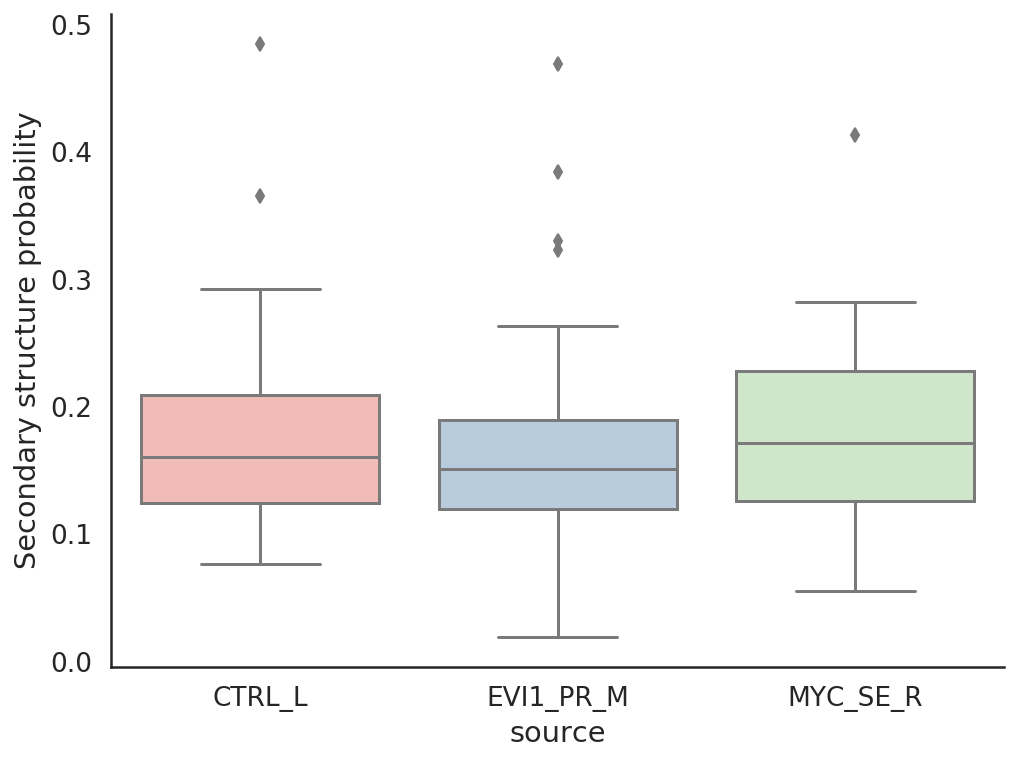

In [7]:
import seaborn as sns
plt.figure(figsize = (8,6))
sns.set(font_scale = 1.2)
sns.set_style('white')
sns.boxplot(data=df_stack, y="Secondary structure probability", x='source', palette='Pastel1')
sns.despine()
plt.show()

In [8]:
from scipy.stats import mannwhitneyu
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(df_stack['Secondary structure probability'], df_stack['source'])

# do pairwise tests with MannWhitneyU, Holm correction
res, _, _ = mc.allpairtest(mannwhitneyu, method='holm')

# display results as table
res

group1,group2,stat,pval,pval_corr,reject
CTRL_L,EVI1_PR_M,3386.0,0.2227,0.4454,False
CTRL_L,MYC_SE_R,2494.0,0.5254,0.5254,False
EVI1_PR_M,MYC_SE_R,2258.0,0.0726,0.2179,False


In [9]:
colnames = ['Chromosome', 'Start', 'End', 'Name', '20nt hits', 'Align', 'Chromosome targets', 'Sequence', 'Tm', 'GC', 'Source']
path = "./Altius_PaintShop.csv"
df_4 = pd.read_csv(path, names=colnames, header=None)
df_4

,Chromosome,Start,End,Name,20nt hits,Align,Chromosome targets,Sequence,Tm,GC,Source
0,chr3,169000047,169000087,CTRL_L_8,1.0,40,chr3,CACTCAGTTTGGGATGGGAGTTTAGCTATCTTCTTTCCAG,42.177064,45.000000,Altius
1,chr3,169000299,169000339,CTRL_L_14,1.0,40,chr3,GTCCTTTCTTTGGTCTTTGCTTTCCACTTTAGCCCTAATG,42.028058,42.500000,Altius
2,chr3,169000341,169000381,CTRL_L_15,1.0,40,chr3,AACTATTTTCCTCTCTTCCAAAGGCTTTTTCAGTCCTTCT,40.904312,37.500000,Altius
3,chr3,169000383,169000423,CTRL_L_16,1.0,40,chr3,ATCAGAAGACATTAAAATCCTCCATTGAATCCTCTGACCT,40.327513,37.500000,Altius
4,chr3,169000467,169000507,CTRL_L_18,1.0,40,chr3,ACAATCACAATAAACTGTTGATTCCAGACCTTTTTCCACA,40.458661,35.000000,Altius
...,...,...,...,...,...,...,...,...,...,...,...
149,chr3,169008890,169008926,NaN,NaN,NaN,NaN,ATTACATCCTCATACAGTTGCAAACAGGAGTCCCAGG,42.310000,45.945946,PaintSHOP
150,chr3,169008955,169008991,NaN,NaN,NaN,NaN,TCCTGCTATTGCTGTTGCTATTGCTATTGTTGAAGCC,42.170000,43.243243,PaintSHOP
151,chr3,169009187,169009223,NaN,NaN,NaN,NaN,AGTCACTCAGGTGATTGTCTTAGCTCACCATTGAAGG,42.190000,45.945946,PaintSHOP
152,chr3,169009947,169009983,NaN,NaN,NaN,NaN,TTTTCTGCTGCTACGTTCTTTTCTCAAAGCTTGCTCA,42.050000,40.540541,PaintSHOP


In [10]:
df_4["Secondary structure probability"] = df_4['Sequence'].apply(oligo_linear_probability)

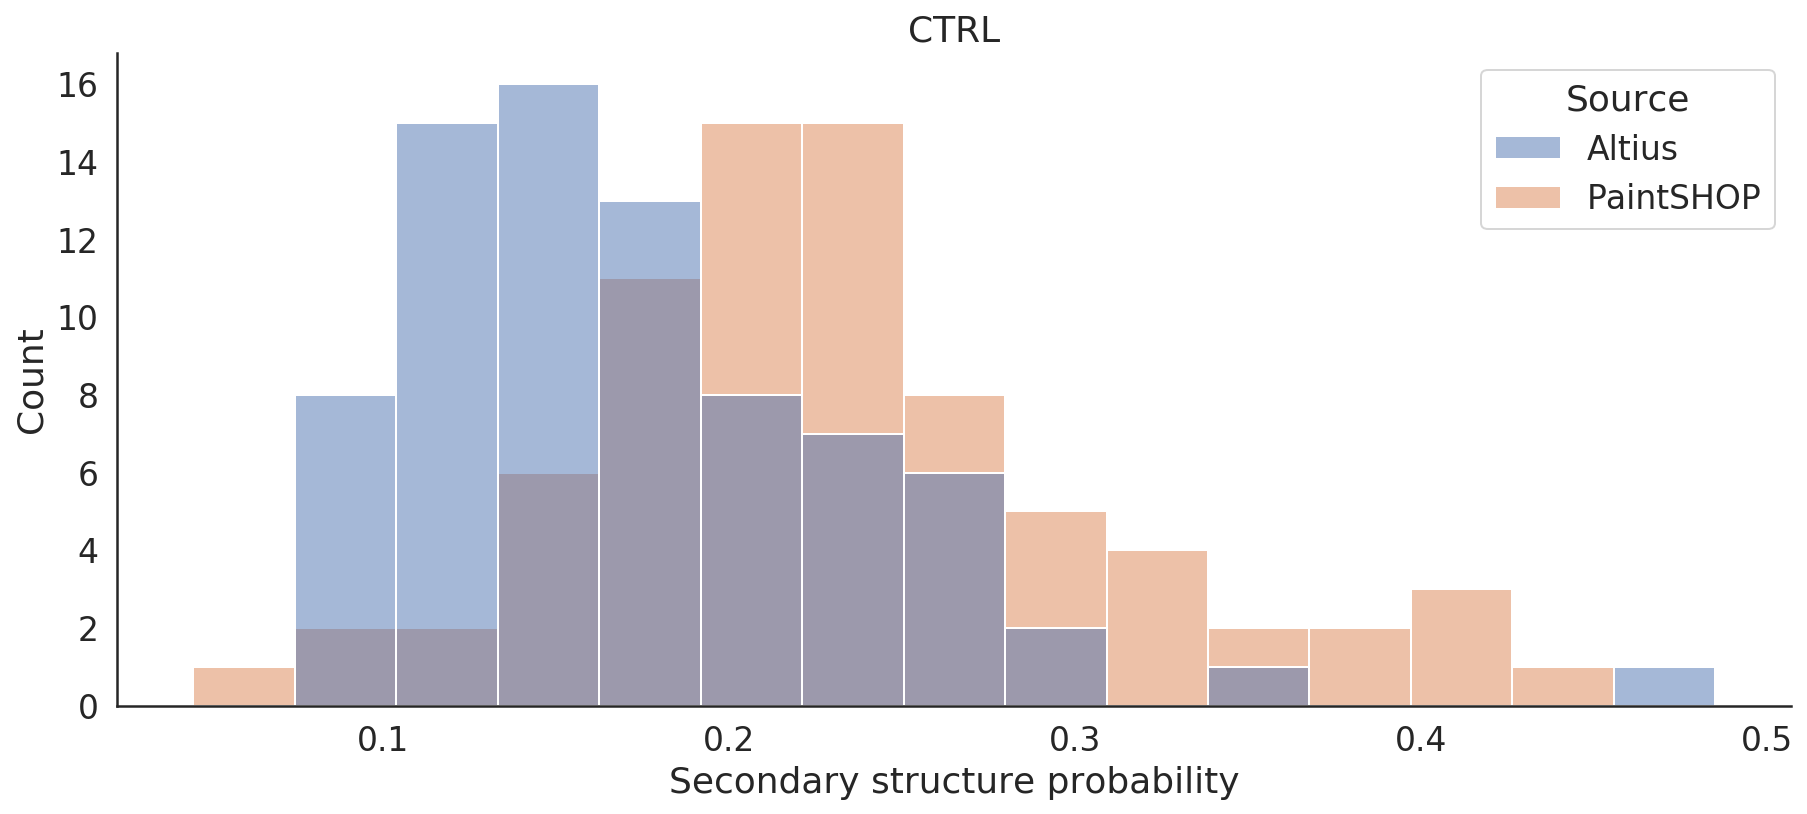

In [11]:
plt.figure(figsize = (15,6))
sns.set(font_scale=1.5)
sns.set_style("white")
hist=sns.histplot(data=df_4, x="Secondary structure probability", hue='Source', bins=15)
hist.set_title('CTRL')
sns.despine()
plt.show()